# KMeans: Scitkit, Pilot and Spark/MLlib


This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant (see <https://archive.ics.uci.edu/ml/datasets/Iris>). 

Source: R. A. Fisher, The Use of Multiple Measurements in Taxonomic Problems, 1936, http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf

Pictures (Source [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set))

<table>
<tr><td>
Setosa
</td><td>
Versicolor
</td><td>
Virginica
</td></tr>
<tr><td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg"/> 
</td><td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg"/>
</td><td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg"/>
</td></tr></table>

## Data Overview

In [22]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv")
data.head()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

## Scikit

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
results = kmeans.fit_predict(data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']])

In [7]:
data_kmeans=pd.concat([data, pd.Series(results, name="ClusterId")], axis=1)
data_kmeans.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,ClusterId
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In the following we evaluate the model using the sum of squared error and a pair plot. The following pairplots show the scatter-plot between each of the four features. Clusters for the different species are indicated by the color.

In [8]:
print "Sum of squared error: %.1f"%kmeans.inertia_

Sum of squared error: 78.9


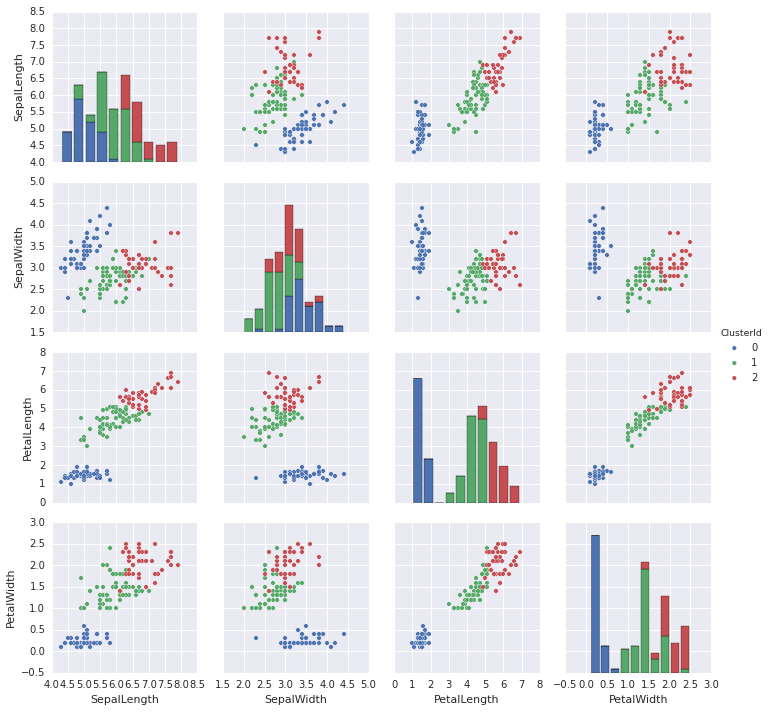

In [16]:
sns.pairplot(data_kmeans, vars=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"], hue="ClusterId");

## Pilot Approach

In [19]:
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import euclidean_distances

def mapper(data, centroids):
    # compute distances between all points and centroids
    distance = sklearn.metrics.pairwise.euclidean_distances(data, clusters)
    # compute cluster with min distance
    cluster_id = np.argmin(distance, axis=1)
    # reshape to row vector
    cluster_id = cluster_id[:, np.newaxis]
    # join data and cluster ids
    data=np.column_stack((data, cluster_id))
    return data


def compute_new_centroids(distances):
    df = pd.DataFrame(distances)
    df[3] =  df[3].astype(int)
    df = df.groupby(3)[0,1,2].mean()
    centroids_np = df.as_matrix()
    return centroids_np

In [ ]:
import os, sys
import commands
import radical.pilot as rp
os.environ["RADICAL_PILOT_DBURL"]="mongodb://ec2-54-221-194-147.compute-1.amazonaws.com:24242/giannis"
pdesc = rp.ComputePilotDescription ()
pdesc.resource = "local.localhost"
pdesc.runtime  = 10 
pdesc.cores    = 16
pdesc.cleanup  = False
pilot = pmgr.submit_pilots(pdesc)
umgr = rp.UnitManager (session=session,
                       scheduler=rp.SCHED_DIRECT_SUBMISSION)
umgr.add_pilots(pilot)

Partition data and distribute to a set of CUs for fast processing

In [32]:
clusters = data.sample(5)

In [33]:
clusters

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
13,4.3,3.0,1.1,0.1,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica


In [34]:
clusters.to_csv("clusters.csv")
data.to_csv("points.csv")

In [3]:
#distances = !/opt/anaconda/envs/python2/bin/python mapper.py points.csv clusters.csv
distances = !python mapper.py points.csv clusters.csv

In [5]:
!ls

Kmeans.ipynb


In [4]:
distances

["python: can't open file 'mapper.py': [Errno 2] No such file or directory"]

In [56]:
import numpy as np 

In [58]:
distances_string = np.fromstring(" ".join(distances))

array([  6.03831417e-154,   2.40492330e-057,   1.95997825e-062,
         1.30282730e-057,   6.03397203e-154,   3.24245686e-086,
         8.68917726e-153,   6.04705439e-154,   3.66962174e-062,
         1.95997825e-062,   1.30282730e-057,   1.28137781e-153,
         3.24245687e-086,   8.68917726e-153,   6.01355015e-154,
         2.40492330e-057,   1.95997825e-062,   8.53820897e-053,
         1.87804507e-153,   3.24245690e-086,   8.68917726e-153,
         6.04559768e-154,   2.40492330e-057,   1.95998010e-062,
         8.53820897e-053,   1.50512804e-153,   3.24245687e-086,
         8.68917726e-153,   6.04268427e-154,   2.40492330e-057,
         6.96324153e-077,   1.30282730e-057,   1.28137781e-153,
         3.24245687e-086,   8.68917726e-153,   6.04268429e-154,
         1.57609053e-052,   1.95997825e-062,   1.30282730e-057,
         1.50512804e-153,   3.24245688e-086,   8.68917726e-153,
         6.04851110e-154,   2.40492330e-057,   1.95997639e-062,
         1.30282730e-057,   6.03397203e-

In [8]:
import numpy as np


distances_np = np.array([  6.03831417e-154,   2.40492330e-057,   1.95997825e-062,
         1.30282730e-057,   6.03397203e-154,   3.24245686e-086,
         8.68917726e-153,   6.04705439e-154,   3.66962174e-062,
         1.95997825e-062,   1.30282730e-057,   1.28137781e-153,
         3.24245687e-086,   8.68917726e-153,   6.01355015e-154,
         2.40492330e-057,   1.95997825e-062,   8.53820897e-053,
         1.87804507e-153,   3.24245690e-086,   8.68917726e-153,
         6.04559768e-154,   2.40492330e-057,   1.95998010e-062,
         8.53820897e-053,   1.50512804e-153,   3.24245687e-086,
         8.68917726e-153,   6.04268427e-154,   2.40492330e-057,
         6.96324153e-077,   1.30282730e-057,   1.28137781e-153,
         3.24245687e-086,   8.68917726e-153,   6.04268429e-154,
         1.57609053e-052,   1.95997825e-062,   1.30282730e-057,
         1.50512804e-153,   3.24245688e-086,   8.68917726e-153,
         6.04851110e-154,   2.40492330e-057,   1.95997639e-062,
         1.30282730e-057,   6.03397203e-154,   3.24245682e-086,
         8.68917721e-153,   6.04851112e-154,   5.59939840e-067,
         1.95997825e-062,   8.53820897e-053,   1.50512917e-153,
         3.24245687e-086,   8.68917726e-153,   6.04268429e-154,
         3.66962174e-062,   1.95998196e-062,   8.53820897e-053,
         1.57971144e-153,   3.24245686e-086,   8.68917726e-153,
         6.04705441e-154,   6.76925730e-043,   1.95998010e-062,
         8.53820897e-053,   1.80346166e-153,   3.24245687e-086,
         8.68917726e-153,   6.04268429e-154,   6.76925730e-043,
         1.95997825e-062,   8.53820897e-053,   1.72887826e-153,
         3.24245687e-086,   8.68917726e-153,   6.04559768e-154,
         1.12590726e-153,   1.95997825e-062,   8.53820897e-053,
         1.43054463e-153,   3.24245690e-086,   8.68917726e-153,
         6.04851110e-154,   2.90737387e-033,   1.95997825e-062,
         8.53820897e-053,   6.03397203e-154,   3.24245688e-086,
         8.68917726e-153,   6.01355015e-154,   1.03290669e-047,
         1.95998196e-062,   8.53820897e-053,   1.57971144e-153,
         3.24245687e-086,   8.68917726e-153,   6.03977088e-154,
         2.40492330e-057,   1.95997825e-062,   1.30282730e-057,
         1.35596122e-153,   3.24245688e-086,   8.68917726e-153,
         6.04851110e-154,   1.03290669e-047,   1.95997825e-062,
         8.53820897e-053,   1.50512804e-153,   3.24245687e-086,
         8.68917726e-153,   6.03977088e-154,   1.57609053e-052,
         1.95997639e-062,   8.53820897e-053,   1.35596236e-153,
         3.24245686e-086,   8.68917726e-153,   6.04996780e-154,
         1.57609053e-052,   1.95997639e-062,   8.53820897e-053,
         1.35596122e-153,   3.24245684e-086,   8.68917726e-153,
         6.04414100e-154,   3.66962174e-062,   1.95997825e-062,
         1.30282730e-057,   1.28137781e-153,   3.24245687e-086,
         8.68917726e-153,   6.04268427e-154,   3.66962174e-062,
         6.96324153e-077,   8.53820897e-053,   1.50512804e-153,
         3.24245687e-086,   8.68917726e-153,   6.01355015e-154,
         3.66962174e-062,   1.95998010e-062,   1.30282730e-057,
         1.43054349e-153,   3.24245685e-086,   8.68917721e-153,
         6.04268427e-154,   3.66962174e-062,   6.96324153e-077,
         8.53820897e-053,   1.57971144e-153,   3.24245688e-086,
         8.68917726e-153,   6.03831417e-154,   2.90737387e-033,
         1.95998196e-062,   1.30282730e-057,   6.03397203e-154,
         3.24245686e-086,   8.68917726e-153,   6.03831417e-154,
         1.03290669e-047,   1.95997825e-062,   1.30282730e-057,
         1.35596122e-153,   3.24245686e-086,   8.68917726e-153,
         6.04122758e-154,   1.57609053e-052,   1.95997825e-062,
         8.53820897e-053,   1.43054463e-153,   3.24245686e-086,
         8.68917726e-153,   6.01355019e-154,   6.77188474e-043,
         1.28449378e-057,   5.59560063e-048,   1.35596122e-153,
         3.44353334e-086,   8.68917723e-153,   6.04996785e-154,
         2.90850235e-033,   1.28449499e-057,   8.53820897e-053,
         1.43054349e-153,   3.44353309e-086,   8.68917724e-153,
         6.04414102e-154,   1.03330761e-047,   4.56344292e-072,
         8.53820897e-053,   1.80346053e-153,   3.44353334e-086,
         8.68917724e-153,   6.04122761e-154,   6.77188474e-043,
         4.56344724e-072,   1.30282730e-057,   1.50512690e-153,
         3.44353332e-086,   8.68917724e-153,   6.04559773e-154,
         1.03330761e-047,   2.99069229e-067,   8.53820897e-053,
         1.72887712e-153,   3.44353339e-086,   8.68917724e-153,
         6.01355015e-154,   1.57649837e-052,   2.99063853e-067,
         8.53820897e-053,   6.03397203e-154,   3.44353330e-086,
         8.68917724e-153,   6.01355017e-154,   1.12634427e-153,
         2.99063853e-067,   5.59560063e-048,   1.87804393e-153,
         3.44353336e-086,   8.68917724e-153,   6.04559771e-154,
         1.03317397e-047,   2.99069229e-067,   5.59560063e-048,
         1.28137781e-153,   3.44353333e-086,   8.68917723e-153,
         6.04559771e-154,   1.57670228e-052,   2.99069795e-067,
         8.53820897e-053,   1.72887712e-153,   3.44353329e-086,
         8.68917724e-153,   6.03977090e-154,   1.57670228e-052,
         2.99069795e-067,   8.53820897e-053,   1.57971030e-153,
         3.44353339e-086,   8.68917724e-153,   6.04996783e-154,
         4.43802238e-038,   4.56345588e-072,   5.59560063e-048,
         1.80346053e-153,   3.44353309e-086,   8.68917724e-153,
         6.04122761e-154,   2.90850235e-033,   2.99069795e-067,
         5.59560063e-048,   1.80346053e-153,   3.44353336e-086,
         8.68917724e-153,   6.04268431e-154,   3.67104607e-062,
         2.99069229e-067,   5.59560063e-048,   6.03397203e-154,
         3.44353333e-086,   8.68917723e-153,   6.04851114e-154,
         4.43802238e-038,   1.28449378e-057,   5.59560063e-048,
         6.03397203e-154,   3.44353309e-086,   8.68917728e-153,
         6.01355017e-154,   1.57670228e-052,   2.99069795e-067,
         8.53820897e-053,   1.65429371e-153,   3.44353334e-086,
         8.68917724e-153,   6.04414100e-154,   4.43744841e-038,
         2.99068663e-067,   8.53820897e-053,   1.50512690e-153,
         3.44353336e-086,   8.68917724e-153,   6.04851112e-154,
         2.90812619e-033,   2.99068946e-067,   5.59560063e-048,
         1.72887712e-153,   3.44353329e-086,   8.68917723e-153,
         6.04268429e-154,   1.57670228e-052,   2.99069795e-067,
         5.59560063e-048,   1.50512804e-153,   3.44353334e-086,
         8.68917723e-153,   6.04705443e-154,   6.77188474e-043,
         4.56344292e-072,   5.59560063e-048,   1.43054349e-153,
         3.44353333e-086,   8.68917724e-153,   6.04559771e-154,
         8.54732019e-072,   2.99069229e-067,   8.53820897e-053,
         1.57971030e-153,   3.44353309e-086,   8.68917724e-153,
         6.04414100e-154,   2.40585675e-057,   2.99068946e-067,
         5.59560063e-048,   6.03397203e-154,   3.44353335e-086,
         8.68917724e-153,   6.04851112e-154,   1.12634427e-153,
         2.99068946e-067,   8.53820897e-053,   1.43054349e-153,
         3.44353332e-086,   8.68917724e-153,   6.04559771e-154,
         5.60157176e-067,   2.99069229e-067,   8.53820897e-053,
         6.03397203e-154,   3.44353330e-086,   8.68917724e-153,
         6.04705441e-154,   5.60157176e-067,   2.99069229e-067,
         5.59560063e-048,   1.87804393e-153,   3.44353332e-086,
         8.68917724e-153,   6.03831417e-154,   1.12619860e-153,
         2.99068663e-067,   8.53820897e-053,   1.80346053e-153,
         3.44353329e-086,   8.68917724e-153,   6.04122761e-154,
         1.12663561e-153,   1.28449499e-057,   8.53820897e-053,
         1.72887712e-153,   3.44353329e-086,   8.68917723e-153,
         6.03831421e-154,   2.90887850e-033,   1.28449013e-057,
         5.59560063e-048,   1.87804393e-153,   3.44353335e-086,
         8.68917728e-153,   6.04414102e-154,   4.43859635e-038,
         1.28449134e-057,   3.66713283e-043,   6.03397203e-154,
         3.64460982e-086,   8.68917728e-153,   6.04996780e-154,
         1.57670228e-052,   2.99070361e-067,   3.66713283e-043,
         1.87804393e-153,   3.44353332e-086,   8.68917728e-153,
         6.04705443e-154,   4.43859635e-038,   1.28449864e-057,
         3.66713283e-043,   1.65429485e-153,   3.64460976e-086,
         8.68917728e-153,   6.04414102e-154,   8.54842563e-072,
         1.28446947e-057,   5.59560063e-048,   1.72887712e-153,
         3.44353332e-086,   8.68917728e-153,   6.04851114e-154,
         1.57690620e-052,   1.28449013e-057,   8.53820897e-053,
         1.57971030e-153,   3.64460956e-086,   8.68917723e-153,
         6.04851112e-154,   8.54842563e-072,   4.56343861e-072,
         5.59560063e-048,   1.35596122e-153,   3.64460978e-086,
         8.68917728e-153,   6.04414102e-154,   1.57690620e-052,
         1.28449864e-057,   3.66713283e-043,   1.80346166e-153,
         3.64460983e-086,   8.68917728e-153,   6.04705446e-154,
         2.90925466e-033,   1.28449256e-057,   5.59560063e-048,
         1.35596008e-153,   3.44353309e-086,   8.68917724e-153,
         6.04996785e-154,   6.77276055e-043,   1.28449256e-057,
         8.53820897e-053,   1.80346053e-153,   3.64460986e-086,
         8.68917723e-153,   6.04705446e-154,   6.77363636e-043,
         1.28446947e-057,   5.59560063e-048,   1.72887712e-153,
         3.44353339e-086,   8.68917723e-153,   6.04705443e-154,
         6.77276055e-043,   1.28449013e-057,   3.66713283e-043,
         1.35596122e-153,   3.44353309e-086,   8.68917728e-153,
         6.03977090e-154,   4.43802238e-038,   4.56345588e-072,
         5.59560063e-048,   6.03397203e-154,   3.44353339e-086,
         8.68917723e-153,   6.04268431e-154,   1.03344125e-047,
         1.28449013e-057,   3.66713283e-043,   6.03397203e-154,
         3.44353338e-086,   8.68917728e-153,   6.04268434e-154,
         8.54953106e-072,   1.28449985e-057,   3.66713283e-043,
         1.80346166e-153,   3.64460980e-086,   8.68917728e-153,
         6.04268431e-154,   1.03344125e-047,   1.28449134e-057,
         5.59560063e-048,   1.80346053e-153,   3.44353329e-086,
         8.68917723e-153,   6.03831419e-154,   1.03344125e-047,
         4.56343861e-072,   3.66713283e-043,   6.03397203e-154,
         3.64460976e-086,   8.68917728e-153,   6.04122761e-154,
         1.03344125e-047,   1.28449378e-057,   5.59560063e-048,
         1.28137781e-153,   3.44353334e-086,   8.68917728e-153,
         6.01355017e-154,   4.43802238e-038,   4.56345588e-072,
         5.59560063e-048,   1.28137781e-153,   3.64460980e-086,
         8.68917728e-153,   6.04705443e-154,   1.03344125e-047,
         1.28449378e-057,   5.59560063e-048,   1.28137781e-153,
         3.64460976e-086,   8.68917728e-153,   6.04851112e-154,
         8.54842563e-072,   4.56346020e-072,   5.59560063e-048,
         1.35596122e-153,   3.64460986e-086,   8.68917728e-153,
         6.04705443e-154,   6.77276055e-043,   1.28449499e-057,
         5.59560063e-048,   6.03397203e-154,   3.64460977e-086,
         8.68917728e-153,   6.04122761e-154,   1.12648994e-153,
         1.28449985e-057,   5.59560063e-048,   6.03397203e-154,
         3.64460977e-086,   8.68917728e-153,   6.03977090e-154,
         2.40616790e-057,   1.28449256e-057,   8.53820897e-053,
         6.03397203e-154,   3.44353329e-086,   5.54950725e+141])


In [17]:
length=len(distances_np)/3
distances_np.reshape((length, 3))

array([[  6.03831417e-154,   2.40492330e-057,   1.95997825e-062],
       [  1.30282730e-057,   6.03397203e-154,   3.24245686e-086],
       [  8.68917726e-153,   6.04705439e-154,   3.66962174e-062],
       [  1.95997825e-062,   1.30282730e-057,   1.28137781e-153],
       [  3.24245687e-086,   8.68917726e-153,   6.01355015e-154],
       [  2.40492330e-057,   1.95997825e-062,   8.53820897e-053],
       [  1.87804507e-153,   3.24245690e-086,   8.68917726e-153],
       [  6.04559768e-154,   2.40492330e-057,   1.95998010e-062],
       [  8.53820897e-053,   1.50512804e-153,   3.24245687e-086],
       [  8.68917726e-153,   6.04268427e-154,   2.40492330e-057],
       [  6.96324153e-077,   1.30282730e-057,   1.28137781e-153],
       [  3.24245687e-086,   8.68917726e-153,   6.04268429e-154],
       [  1.57609053e-052,   1.95997825e-062,   1.30282730e-057],
       [  1.50512804e-153,   3.24245688e-086,   8.68917726e-153],
       [  6.04851110e-154,   2.40492330e-057,   1.95997639e-062],
       [  

In [20]:
for i in range(10):
    points_cluster = mapper(data, clusters) 
    new_centroids = compute_new_centroids(points_cluster)
    clusters=new_centroids



NameError: name 'data' is not defined

## Spark MLLib

In [1]:
from numpy import array
from math import sqrt

%run ../env.py
%run ../util/init_spark.py

from pilot_hadoop import PilotComputeService as PilotSparkComputeService

pilotcompute_description = {
    "service_url": "yarn-client://sc15.radical-cybertools.org",
    "number_of_processes": 5
}
pilot_spark = PilotSparkComputeService.create_pilot(pilotcompute_description=pilotcompute_description)
sc = pilot_spark.get_spark_context()
sqlCtx=SQLContext(sc)

SPARK Home: /usr/hdp/2.3.2.0-2950/spark-1.5.1-bin-hadoop2.6


In [5]:
# Load and parse the data
data_spark=sqlCtx.createDataFrame(data)
data_spark_without_class=data_spark.select('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth').show()

+-----------+----------+-----------+----------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|
+-----------+----------+-----------+----------+
|        5.1|       3.5|        1.4|       0.2|
|        4.9|       3.0|        1.4|       0.2|
|        4.7|       3.2|        1.3|       0.2|
|        4.6|       3.1|        1.5|       0.2|
|        5.0|       3.6|        1.4|       0.2|
|        5.4|       3.9|        1.7|       0.4|
|        4.6|       3.4|        1.4|       0.3|
|        5.0|       3.4|        1.5|       0.2|
|        4.4|       2.9|        1.4|       0.2|
|        4.9|       3.1|        1.5|       0.1|
|        5.4|       3.7|        1.5|       0.2|
|        4.8|       3.4|        1.6|       0.2|
|        4.8|       3.0|        1.4|       0.1|
|        4.3|       3.0|        1.1|       0.1|
|        5.8|       4.0|        1.2|       0.2|
|        5.7|       4.4|        1.5|       0.4|
|        5.4|       3.9|        1.3|       0.4|
|        5.1|       3.5|        1.4|    

### Convert DataFrame to Tuple for MLlib

In [6]:
data_spark_tuple = data_spark.map(lambda a: (a[0],a[1],a[2],a[3]))

In [7]:
from pyspark.mllib.clustering import KMeans, KMeansModel
clusters = KMeans.train(data_spark_tuple, 3, maxIterations=10,
                        runs=10, initializationMode="random")

In [10]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = data_spark_tuple.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))


Within Set Sum of Squared Error = 97.3259242343
